# Clustering and Dimentionnality Reduction

<div class="alert alert-block alert-danger">

1. Import the CIFAR-10 dataset using the following code and create a new dataset containing only the following classes: "airplane," "automobile," "bird," and "cat."

<div/>

In [3]:
from matplotlib import pyplot
from keras.datasets import cifar10 # type: ignore
import numpy as np
# load dataset
(trainX, trainy), _ = cifar10.load_data()
label_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)


<div class="alert alert-block alert-warning">The CIFAR-10 dataset is composed of 60000 RGB images( 32x32 pixels), categorized into 10 classes with 6000 images per class. It is divided into 50000 training images and 10000 test images.
<div/>

<div class="alert alert-block alert-danger">


2. Visualize some samples from the dataset with their corresponding labels.

3. Normalize the training data by dividing all values by 255.

4. Visualize the data using a 2D plot by applying dimensionality reduction based on PCA with two components.

5. Apply the K-means algorithm, K-means with PCA (with a variance of 95%), and K-means with LDA (3 components) on the normalized training data.

6. Visualize the data after clustering using a 2D plot (use PCA with 2 components for dimensionality reduction) for each model. What do you observe?

7. Compute the Davies-Bouldin score for all generated models.

8. Display the confusion matrix and the classification reports for all models. What do you observe?

9. Display some misclassifications for the best model (image with the true label and predicted label).

10. Try to enhance the performance of the best model.
<div/>

## 2. Visualize some samples from the dataset with their corresponding labels.



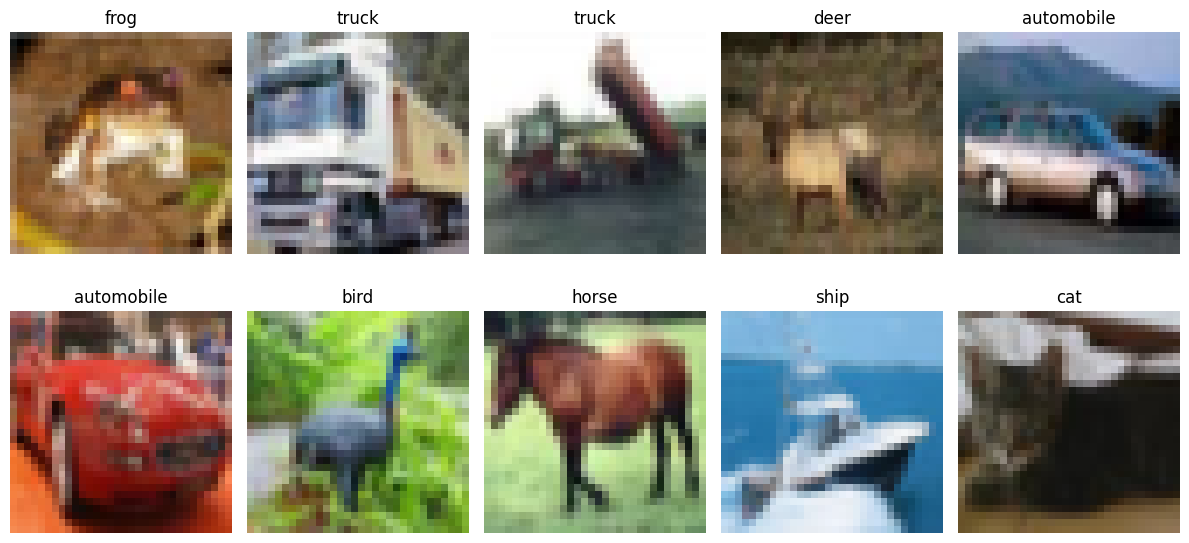

In [4]:
fig, axes = pyplot.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(trainX[i])
    ax.set_title(label_names[trainy[i][0]])
    ax.axis('off')
pyplot.tight_layout()
pyplot.show()

* We use pyplot to display 10 images from the dataset (2 rows, 5 columns).
* Labels are extracted using label_names.

## 3. Normalize the training data by dividing all values by 255.



In [8]:
trainX_normalized = trainX.astype('float32') / 255.0

print(f"Normalized Data Range: {trainX_normalized.min()} to {trainX_normalized.max()}")
trainX_normalized

Normalized Data Range: 0.0 to 1.0


array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

* Dividing by 255 scales the pixel values to a range of [0, 1], which is essential for ML models to converge effectively.

## 4. Visualize the data using a 2D plot by applying dimensionality reduction based on PCA with two components.



In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Flatten images for PCA

In [7]:
trainX_flattened = trainX_normalized.reshape(trainX_normalized.shape[0], -1)
pca = PCA(n_components=2)
trainX_pca = pca.fit_transform(trainX_flattened)
trainX_pca

array([[ -6.40107   ,   2.7292342 ],
       [  0.82971406,  -0.9497649 ],
       [  7.730138  , -11.521969  ],
       ...,
       [  0.7072855 , -11.342393  ],
       [ 11.367841  ,  -3.3758478 ],
       [  4.1927238 ,  -1.1840557 ]], dtype=float32)

### Plot the data

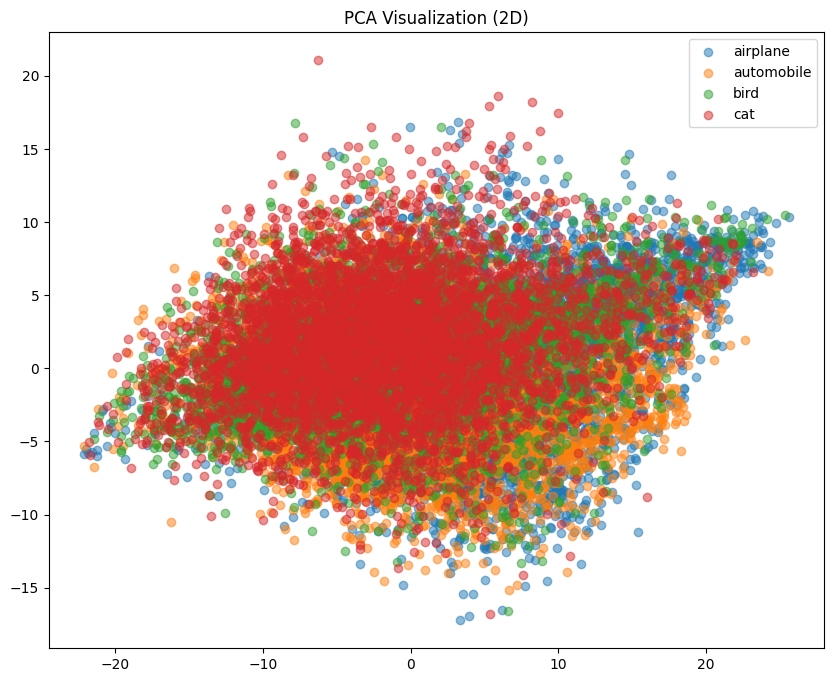

In [9]:
plt.figure(figsize=(10, 8))
for i in range(4):  
    indices = np.where(trainy.flatten() == i)
    plt.scatter(trainX_pca[indices, 0], trainX_pca[indices, 1], label=label_names[i], alpha=0.5)
plt.title("PCA Visualization (2D)")
plt.legend()
plt.show()

## 5. Apply the K-means algorithm, K-means with PCA (with a variance of 95%), and K-means with LDA (3 components) on the normalized training data.



In [10]:
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

### K-means directly on normalized data

In [13]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(trainX_flattened)

### K-means with PCA (retain 95% variance)

In [14]:
pca_95 = PCA(n_components=0.95)
trainX_pca_95 = pca_95.fit_transform(trainX_flattened)
kmeans_pca_95 = KMeans(n_clusters=4)
kmeans_pca_labels = kmeans_pca_95.fit_predict(trainX_pca_95)

### K-means with LDA (3 components)

In [16]:
lda = LDA(n_components=3)
trainy_reshaped = trainy.flatten()[:len(np.unique(trainy.flatten())) * 1000] 
trainX_lda = lda.fit_transform(trainX_flattened[:trainy_reshaped.size], trainy_reshaped)
kmeans_lda = KMeans(n_clusters=4, random_state=42)
kmeans_lda_labels = kmeans_lda.fit_predict(trainX_lda)

**Explanation of the Code:**
```python
  trainy_reshaped = trainy.flatten()[:len(np.unique(trainy.flatten())) * 1000]
```
1. `trainy.flatten()`:
  * he `trainy` dataset contains labels as a 2D array with shape `(n_samples, 1)`.
  * `flatten() `converts this 2D array into a 1D array, so the labels are easier to manipulate <br>
  Example: 
    ```python
      trainy = [[0], [1], [2], [3], [0], [1]]  # Shape (6, 1)
      trainy.flatten()  # Output: [0, 1, 2, 3, 0, 1]
    ```

2. `[:len(np.unique(trainy.flatten())) * 1000]`:
  * The `[:...]` slicing operation limits the number of labels in the reshaped array.
  * It selects only the first `len(np.unique(trainy.flatten())) * 1000` labels (for CIFAR-10, this would be `10 * 1000 = 10,000` labels).
  * This step ensures compatibility with **LDA**, which requires a balanced dataset (equal number of samples for each class). <br>
  Example:
    ```python
      # Suppose trainy.flatten() has 50,000 labels
      trainy_reshaped = trainy.flatten()[:10 * 1000]  # Keep only 10,000 labels
    ```
  <br><br>
**Purpose of the Code:** <br>
The code is necessary because **Linear Discriminant Analysis (LDA)** works best when each class has an equal number of samples. The slicing ensures that we keep only a balanced subset of the dataset (e.g., 1,000 samples per class) before applying LDA. <br>
<br><br>
**Why is this important?**
1. **LDA Assumptions:**
  * LDA assumes normally distributed data within each class.
  * It performs better when the dataset is balanced across classes.
2. **Computational Efficiency:**
  * Limiting the dataset size improves LDA's computational performance, especially on high-dimensional datasets like CIFAR-10.

## 6. Visualize the data after clustering using a 2D plot (use PCA with 2 components for dimensionality reduction) for each model. What do you observe?



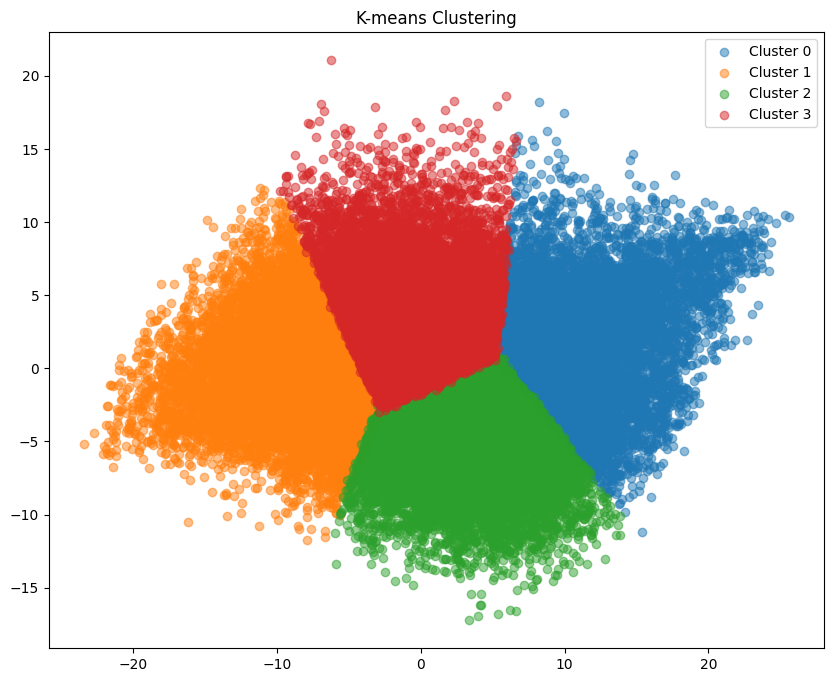

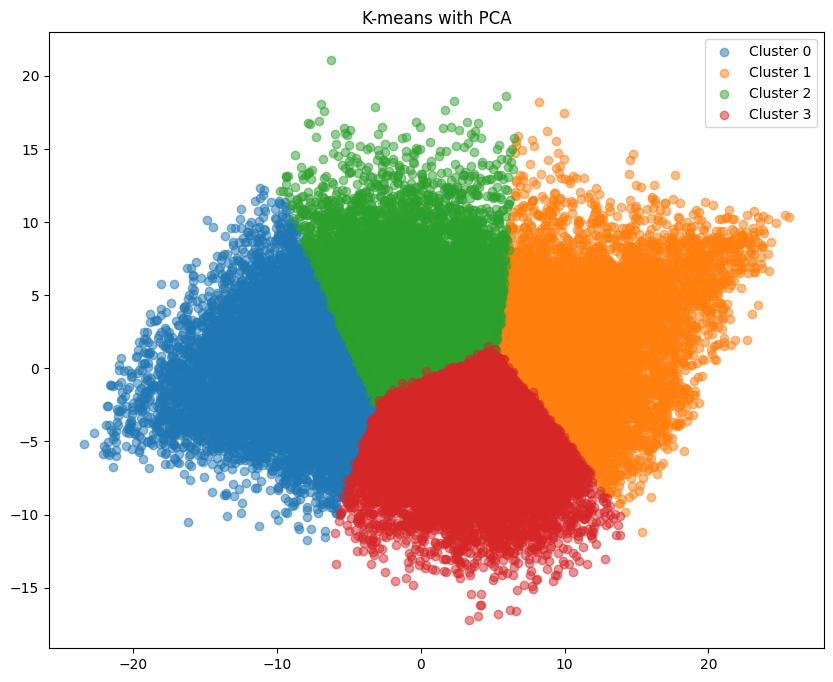

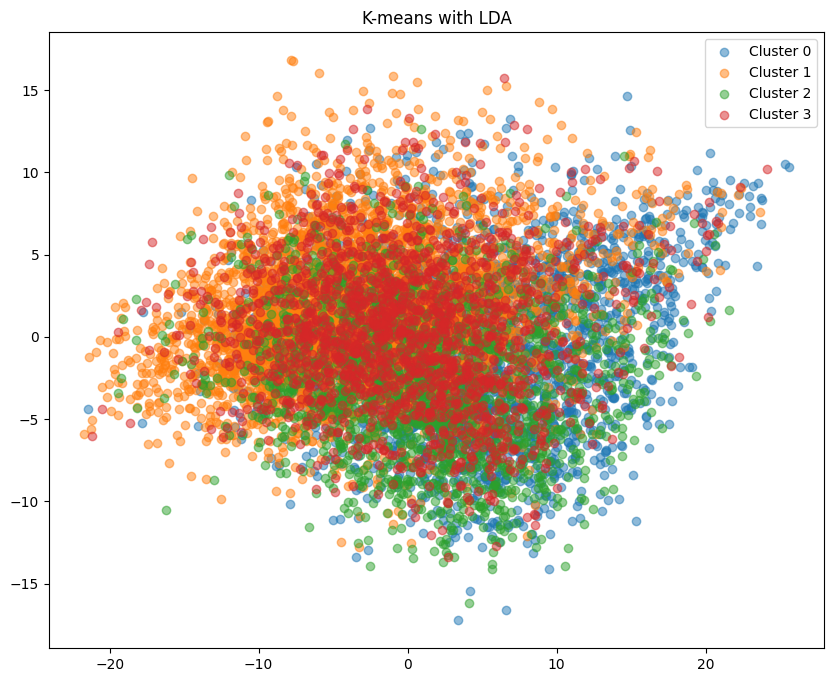

In [17]:
trainX_cluster_pca = PCA(n_components=2).fit_transform(trainX_flattened)

# Plot clusters
def plot_clusters(data, labels, title):
    plt.figure(figsize=(10, 8))
    for i in range(4):
        indices = np.where(labels == i)
        plt.scatter(data[indices, 0], data[indices, 1], label=f"Cluster {i}", alpha=0.5)
    plt.title(title)
    plt.legend()
    plt.show()

plot_clusters(trainX_cluster_pca, kmeans.labels_, "K-means Clustering")
plot_clusters(trainX_cluster_pca, kmeans_pca_labels, "K-means with PCA")
plot_clusters(trainX_cluster_pca, kmeans_lda_labels, "K-means with LDA")


## 7. Compute the Davies-Bouldin score for all generated models.



In [ ]:
from sklearn.metrics import davies_bouldin_score

db_kmeans = davies_bouldin_score(trainX_flattened, kmeans_labels)
db_kmeans_pca = davies_bouldin_score(trainX_pca_95, kmeans_pca_labels)
db_kmeans_lda = davies_bouldin_score(trainX_lda, kmeans_lda_labels)

print(f"Davies-Bouldin Score (K-means): {db_kmeans}")
print(f"Davies-Bouldin Score (K-means with PCA): {db_kmeans_pca}")
print(f"Davies-Bouldin Score (K-means with LDA): {db_kmeans_lda}")
	

Davies-Bouldin Score (K-means): 2.433088909847602
Davies-Bouldin Score (K-means with PCA): 2.3423284742494626
Davies-Bouldin Score (K-means with LDA): 1.071241994584737


The **Davies-Bouldin Score (DBS)** is a metric used to evaluate the quality of clustering results. It measures how well the clusters are separated and how compact they are. A lower Davies-Bouldin Score indicates better clustering, as it reflects clusters that are compact and well-separated. <br><br>
**Formula : **
$$ \text{DBS} = \frac{1}{N}\sum_{i=1}^{N}{ \max_{i\neq j}\bigg(\frac{S_i+Sj}{M_{ij}}\bigg)} $$
Where: <br>
- $N$: Number of clusters.
- $S_i$ Measure of scatter (compactness) for cluster $i$, typically the average distance between points in the cluster and its centroid.
   $$ S_i = \frac{1}{n_i} \sum_{x \in C_i}{\left\| x-c_i \right\|} $$
   $C_i$ is the cluster, $n_i$ is the number of points in $C_i$ and $c_i$ is the cluster centroid.	
- $M_{ij}$ Measure of separation between clusters $i$ and $j$ typically the Euclidean distance between their centroids:
  $$ M_{ij} = \left\| c_i-c_j \right\| $$

The Davies-Bouldin Score is the average of the "worst-case" similarity ratio $\Big(\frac{S_i+Sj}{M_{ij}}\Big)$ between each cluster and the cluster most similar to it.


## 8. Display the confusion matrix and the classification reports for all models. What do you observe?



In [19]:
from sklearn.metrics import confusion_matrix, classification_report

# Classification reports for each clustering model
print("K-means Classification Report:")
print(classification_report(trainy.flatten(), kmeans.labels_))

print("K-means with PCA Classification Report:")
print(classification_report(trainy.flatten(), kmeans_pca_labels))

print("K-means with LDA Classification Report:")
print(classification_report(trainy.flatten()[:len(kmeans_lda_labels)], kmeans_lda_labels))


K-means Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.41      0.31      5000
           1       0.12      0.33      0.17      5000
           2       0.05      0.13      0.08      5000
           3       0.12      0.38      0.19      5000
           4       0.00      0.00      0.00      5000
           5       0.00      0.00      0.00      5000
           6       0.00      0.00      0.00      5000
           7       0.00      0.00      0.00      5000
           8       0.00      0.00      0.00      5000
           9       0.00      0.00      0.00      5000

    accuracy                           0.12     50000
   macro avg       0.05      0.12      0.07     50000
weighted avg       0.05      0.12      0.07     50000

K-means with PCA Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.13      0.07      5000
           1       0.09      0.14      0.11      5000
       

c:\Users\ASUS\anaconda3\envs\env_ML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\anaconda3\envs\env_ML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\anaconda3\envs\env_ML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

## 9. Display some misclassifications for the best model (image with the true label and predicted label).



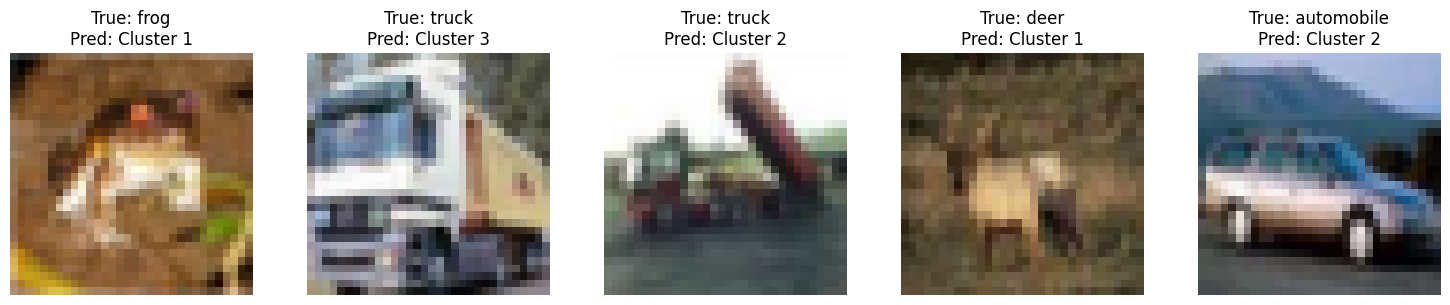

In [20]:
misclassified_indices = np.where(kmeans.labels_ != trainy.flatten())[0]

fig, axes = pyplot.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    index = misclassified_indices[i]
    ax.imshow(trainX[index])
    ax.set_title(f"True: {label_names[trainy[index][0]]}\nPred: Cluster {kmeans.labels_[index]}")
    ax.axis('off')
pyplot.tight_layout()
pyplot.show()


## 10. Try to enhance the performance of the best model.

In [21]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
trainX_scaled = scaler.fit_transform(trainX_flattened)

# Reapply K-means on scaled data
kmeans_scaled = KMeans(n_clusters=4, random_state=42)
kmeans_scaled_labels = kmeans_scaled.fit_predict(trainX_scaled)

# Evaluate enhanced performance
db_scaled = davies_bouldin_score(trainX_scaled, kmeans_scaled_labels)
print(f"Enhanced Davies-Bouldin Score: {db_scaled}")


Enhanced Davies-Bouldin Score: 2.457729589213396
